# Lung Cancer Detection 

In [1]:
import os
import pandas as pd

import seaborn as sns

import imageio
import tensorflow as tf
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

### Lung Image

### No Cancer: Normal Lung Images 

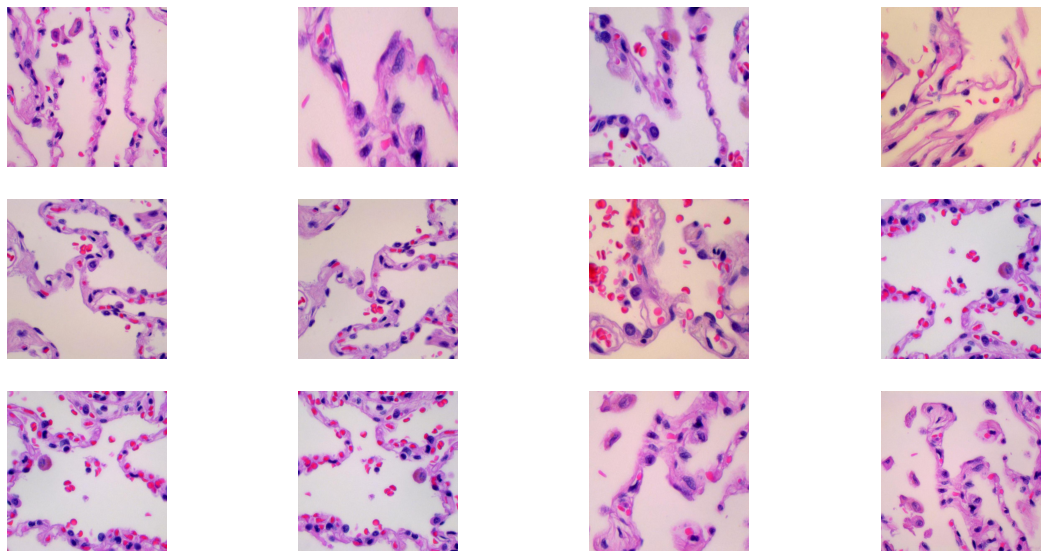

In [2]:
n_images = os.listdir("D:\Lung_image_dataset\lung_image_sets\lung_n")
n_images_dir = "D:\Lung_image_dataset\lung_image_sets\lung_n"

plt.figure(figsize=(20, 10))

for i in range(12):
    plt.subplot(3, 4, i + 1)
    img = plt.imread(os.path.join(n_images_dir, n_images[i]))
    plt.imshow(img, cmap='gray')
    plt.axis('off')

### Lung Cancer: Adenocarcinoma Images

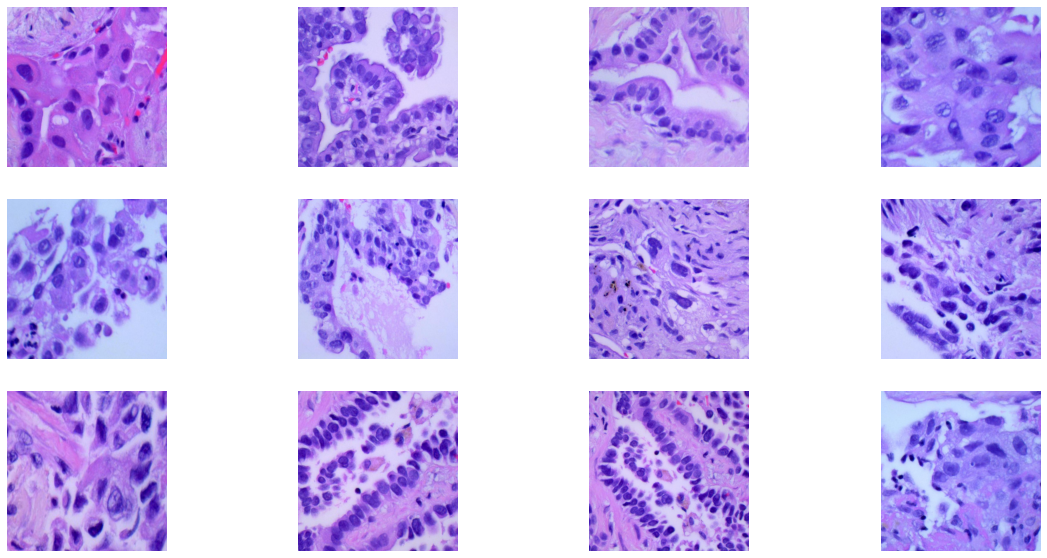

In [3]:
aca_images = os.listdir("D:\Lung_image_dataset\lung_image_sets\lung_aca")
aca_images_dir = "D:\Lung_image_dataset\lung_image_sets\lung_aca"

plt.figure(figsize=(20, 10))

for i in range(12):
    plt.subplot(3, 4, i + 1)
    img = plt.imread(os.path.join(aca_images_dir, aca_images[i]))
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    
#plt.tight_layout()

### Lung Cancer: Squamous Cell Carcinoma Images

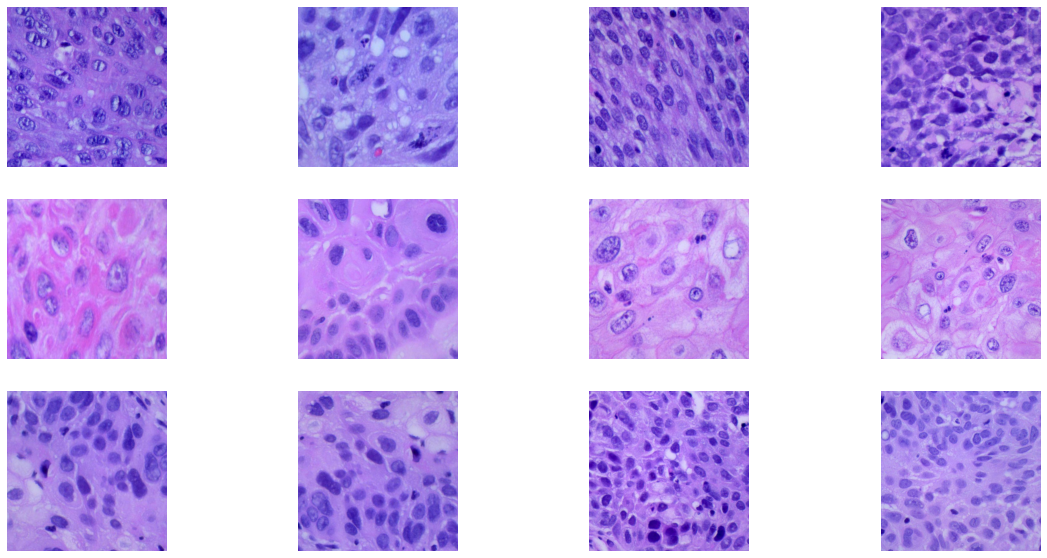

In [4]:
scc_images = os.listdir("D:\Lung_image_dataset\lung_image_sets\lung_scc")
scc_images_dir = "D:\Lung_image_dataset\lung_image_sets\lung_scc"

plt.figure(figsize=(20, 10))

for i in range(12):
    plt.subplot(3, 4, i + 1)
    img = plt.imread(os.path.join(scc_images_dir, scc_images[i]))
    plt.imshow(img, cmap='gray')
    plt.axis('off')

In [5]:
image_set="D:\Lung_image_dataset\lung_image_sets"

In [6]:
height = width = 224

datagen = tf.keras.preprocessing.image.ImageDataGenerator(validation_split = 0.2)

train_set = datagen.flow_from_directory(image_set,
                                       class_mode = "categorical",
                                       target_size = (height,width),
                                       color_mode="rgb",
                                       batch_size = 128, 
                                       shuffle = False,
                                       subset='training',
                                       seed = 42)

validate_set = datagen.flow_from_directory(image_set,
                                       class_mode = "categorical",
                                       target_size = (height,width),
                                       color_mode="rgb",
                                       batch_size = 128, 
                                       shuffle = False,
                                       subset='validation',
                                       seed = 42)


Found 12000 images belonging to 3 classes.
Found 3000 images belonging to 3 classes.


In [7]:
image_size=[224,224]
resnet = ResNet50(input_shape=image_size + [3], weights='imagenet', include_top=False)

In [8]:
# don't train existing weights
for layer in resnet.layers:
    layer.trainable = False

In [9]:
flatten = Flatten()(resnet.output)
dense = Dense(256, activation = 'relu')(flatten)
dense = Dense(128, activation = 'relu')(dense)
prediction = Dense(3, activation = 'softmax')(dense)

In [10]:
#creating a model
model = Model(inputs = resnet.input, outputs = prediction )

In [11]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                              

                                                                                                  
 conv2_block3_1_relu (Activatio  (None, 56, 56, 64)  0           ['conv2_block3_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv2_block3_2_conv (Conv2D)   (None, 56, 56, 64)   36928       ['conv2_block3_1_relu[0][0]']    
                                                                                                  
 conv2_block3_2_bn (BatchNormal  (None, 56, 56, 64)  256         ['conv2_block3_2_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv2_block3_2_relu (Activatio  (None, 56, 56, 64)  0           ['conv2_block3_2_bn[0][0]']      
 n)       

                                                                                                  
 conv3_block3_1_relu (Activatio  (None, 28, 28, 128)  0          ['conv3_block3_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv3_block3_2_conv (Conv2D)   (None, 28, 28, 128)  147584      ['conv3_block3_1_relu[0][0]']    
                                                                                                  
 conv3_block3_2_bn (BatchNormal  (None, 28, 28, 128)  512        ['conv3_block3_2_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv3_block3_2_relu (Activatio  (None, 28, 28, 128)  0          ['conv3_block3_2_bn[0][0]']      
 n)       

                                                                                                  
 conv4_block2_1_bn (BatchNormal  (None, 14, 14, 256)  1024       ['conv4_block2_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_block2_1_relu (Activatio  (None, 14, 14, 256)  0          ['conv4_block2_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_block2_2_conv (Conv2D)   (None, 14, 14, 256)  590080      ['conv4_block2_1_relu[0][0]']    
                                                                                                  
 conv4_block2_2_bn (BatchNormal  (None, 14, 14, 256)  1024       ['conv4_block2_2_conv[0][0]']    
 ization) 

 conv4_block5_1_conv (Conv2D)   (None, 14, 14, 256)  262400      ['conv4_block4_out[0][0]']       
                                                                                                  
 conv4_block5_1_bn (BatchNormal  (None, 14, 14, 256)  1024       ['conv4_block5_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_block5_1_relu (Activatio  (None, 14, 14, 256)  0          ['conv4_block5_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_block5_2_conv (Conv2D)   (None, 14, 14, 256)  590080      ['conv4_block5_1_relu[0][0]']    
                                                                                                  
 conv4_blo

                                                                  'conv5_block1_3_bn[0][0]']      
                                                                                                  
 conv5_block1_out (Activation)  (None, 7, 7, 2048)   0           ['conv5_block1_add[0][0]']       
                                                                                                  
 conv5_block2_1_conv (Conv2D)   (None, 7, 7, 512)    1049088     ['conv5_block1_out[0][0]']       
                                                                                                  
 conv5_block2_1_bn (BatchNormal  (None, 7, 7, 512)   2048        ['conv5_block2_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv5_block2_1_relu (Activatio  (None, 7, 7, 512)   0           ['conv5_block2_1_bn[0][0]']      
 n)       

In [12]:
# COMPILING THE MODEL

model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [13]:
#executing the model
history = model.fit_generator(train_set, validation_data = (validate_set), epochs = 5, verbose = 1)

C:\Users\husn.ara\AppData\Local\Temp/ipykernel_6324/1353619056.py:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(train_set, validation_data = (validate_set), epochs = 5, verbose = 1)


Epoch 1/5
94/94 [==============================] - 2248s 23s/step - loss: 13.7270 - accuracy: 0.7988 - val_loss: 0.6995 - val_accuracy: 0.9147
Epoch 2/5
94/94 [==============================] - 1234s 13s/step - loss: 0.3888 - accuracy: 0.9523 - val_loss: 0.2800 - val_accuracy: 0.9493
Epoch 3/5
94/94 [==============================] - 1354s 14s/step - loss: 0.1199 - accuracy: 0.9694 - val_loss: 0.1967 - val_accuracy: 0.9493
Epoch 4/5
94/94 [==============================] - 1351s 14s/step - loss: 0.0192 - accuracy: 0.9927 - val_loss: 0.0534 - val_accuracy: 0.9810
Epoch 5/5
94/94 [==============================] - 1927s 21s/step - loss: 0.0078 - accuracy: 0.9972 - val_loss: 0.0370 - val_accuracy: 0.9880


## Loss Graph

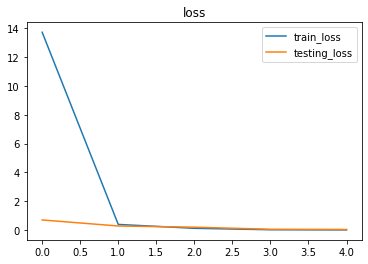

In [14]:
# plotting the loss
plt.plot(history.history['loss'],label = 'train_loss')
plt.plot(history.history['val_loss'], label = 'testing_loss')
plt.title('loss')
plt.legend()
plt.show()

## Accuracy Graph

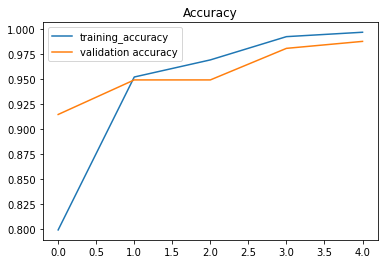

In [15]:
# Both Validation and Training accuracy is shown here

plt.plot(history.history['accuracy'], label='training_accuracy')
plt.plot(history.history['val_accuracy'], label='validation accuracy')
plt.title('Accuracy')
plt.legend()
plt.show()

In [16]:
# CONFUSION MATRIX

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
Y_pred = model.predict_generator(validate_set)
y_pred = np.argmax(Y_pred ,axis =1)
print('Confusion Matrix')
confusion_matrix = confusion_matrix(validate_set.classes, y_pred)
print(confusion_matrix)
print('Classification Report')
target_names = ['aca','n', 'scc']
print(classification_report(validate_set.classes, y_pred, target_names=target_names))


C:\Users\husn.ara\AppData\Local\Temp/ipykernel_6324/3742674480.py:6: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  Y_pred = model.predict_generator(validate_set)


Confusion Matrix
[[983   1  16]
 [  2 998   0]
 [ 17   0 983]]
Classification Report
              precision    recall  f1-score   support

         aca       0.98      0.98      0.98      1000
           n       1.00      1.00      1.00      1000
         scc       0.98      0.98      0.98      1000

    accuracy                           0.99      3000
   macro avg       0.99      0.99      0.99      3000
weighted avg       0.99      0.99      0.99      3000



### Test Accuracy & Loss

In [17]:
result = model.evaluate(validate_set,batch_size=128)
print("test_loss, test accuracy",result)

24/24 [==============================] - 295s 12s/step - loss: 0.0370 - accuracy: 0.9880
test_loss, test accuracy [0.03703659027814865, 0.9879999756813049]


### Model Save

In [40]:
model.save("Lung_HDA.h5")

# Single Image Prediction

1/1 [==============================] - 0s 122ms/step
Scc
0.9999995


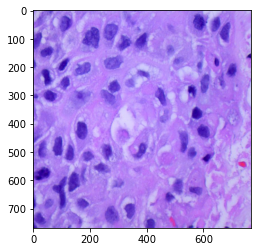

In [39]:


#%pylab inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import keras.utils as image

path='D:/Lung_Test/scc/lungscc23.jpeg'
img=mpimg.imread(path)
imgplot = plt.imshow(img)

test_image = image.load_img(path, target_size = (224, 224))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = model.predict(test_image)
#print(result[0][2])
if result[0][0]>result[0][1] and result[0][0]>result[0][2]:
    res= "Aca"
    prob=result[0][0]
elif result[0][1]>result[0][0] and result[0][1]>result[0][2]:
    res="Normal"
    prob=result[0][1]
else:
    res="Scc"
    prob=result[0][2]
print(res)
print(prob)

1/1 [==============================] - 0s 145ms/step
Aca
0.99973816


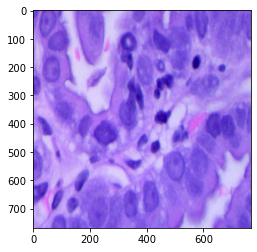

In [33]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import keras.utils as image

path='D:/Lung_Test/aca/lungaca33.jpeg'
img=mpimg.imread(path)
imgplot = plt.imshow(img)

test_image = image.load_img(path, target_size = (224, 224))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = model.predict(test_image)
#print(result[0][2])
if result[0][0]>result[0][1] and result[0][0]>result[0][2]:
    res= "Aca"
    prob=result[0][0]
elif result[0][1]>result[0][0] and result[0][1]>result[0][2]:
    res="Normal"
    prob=result[0][1]
else:
    res="Scc"
    prob=result[0][2]
print(res)
print(prob)

# Single Image Prediction using saved Model

In [43]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import keras.utils as image
from keras.models import load_model
import numpy as np
import tensorflow as tf

h=load_model('Lung_HDA.h5')
path='D:/Lung_Test/scc/lungscc5.jpeg'
img=mpimg.imread(path)


test_image = image.load_img(path, target_size = (224, 224))
test_image = image.img_to_array(test_image)

test_image = np.expand_dims(test_image, axis = 0)
# prepare the image for the ResNet model
test_image = preprocess_input(test_image)
#pred =tf.nn.softmax(h.predict(test_image))
#pred=np.array(pred)[0][0]
result=h.predict(test_image)
if result[0][0]>result[0][1] and result[0][0]>result[0][2]:
    res= "Aca"
    prob=result[0][0]
elif result[0][1]>result[0][0] and result[0][1]>result[0][2]:
    res="Normal"
    prob=result[0][1]
else:
    res="Scc"
    prob=result[0][2]
print(res)
print(prob)
#output=np.append(np.array(res),np.array(pred*100))
#print("Result         Prediction Score")
#print(output)

1/1 [==============================] - 51s 51s/step
Scc
0.93154866
